In [4]:
# Import libraries for data wrangling, preprocessing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
from keras import backend as K
from keras import callbacks
from keras import layers
from keras import models
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import tensorflow as tf
from sklearn import metrics
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.externals import joblib
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib



## FAKE_NOISE_KerasBinaryClassifier

In [5]:


class FakeNoiseNN:
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    def test_KerasBinaryClassifier(self,X_testPos,X_testNeg):
        

        X_test = np.concatenate((X_testPos,X_testNeg),axis=0)
        X_testPosLabel = np.ones(len(X_testPos))
        X_testNegLabel = np.zeros(len(X_testNeg))
        y_test = np.concatenate((X_testPosLabel,X_testNegLabel),axis=0)
        directory = os.getcwd()
        pipe = joblib.load(os.path.join(directory, 'pipeline.pkl'))
        model = models.load_model(os.path.join(directory, 'model.h5'))
        pipe.steps.append(('nn', model))


        y_pred_keras = pipe.predict_proba(X_test)[:, 0]
        from sklearn.metrics import roc_curve
        fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
        from sklearn.metrics import auc
        auc_keras = auc(fpr_keras, tpr_keras)
        print(auc_keras)
        return auc_keras
    
    def train_KerasBinaryClassifier(self,X_train,y_train):

        # Use Tenserflow backend
        sess = tf.Session()
        K.set_session(sess)

        def model():
            model = models.Sequential([
                layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
                layers.Dropout(0.5),
                layers.Dense(1, activation='sigmoid')
            ])
            model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
            return model


        early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=0, mode='auto')

        pipe = pipeline.Pipeline([
            ('rescale', preprocessing.StandardScaler()),
            ('nn', KerasClassifier(build_fn=model, nb_epoch=10, batch_size=128,
                                   validation_split=0.2, callbacks=[early_stopping]))
        ])


        pipe.fit(X_train, y_train)

        import os
        directory = os.getcwd()
        model_step = pipe.steps.pop(-1)[1]
        joblib.dump(pipe, os.path.join(directory, 'pipeline.pkl'))
        print("Trained Model is Saved @ ",directory)
        models.save_model(model_step.model, os.path.join(directory, 'model.h5'))


    
    
    def get_TestingData(self):

        dataPath = './'
        import tempfile
        import pickle

        with open(dataPath+'usps_data.pkl','rb') as fp:
              loaded_data1 = pickle.load(fp, encoding='latin1')

        labels = loaded_data1['target']
        data = loaded_data1['data']
        
        ## Scale the data 
       
  
        print(scaler.fit(data))
        StandardScaler(copy=True, with_mean=True, with_std=True)
        data = scaler.transform(data)
   
        ## Select Ones
        k_ones = np.where(labels == 2)
        label_ones = labels[k_ones]
        data_ones = data[k_ones]

        k_sevens = np.where(labels == 8)
        label_sevens = labels[k_sevens]
        data_sevens = data[k_sevens]


        data_ones = data_ones[220:440] 
        data_sevens =  np.random.uniform(0,1,(len(data_ones),256))
        
        label_ones      =  1*np.ones(len(data_ones))
        label_sevens    =  np.zeros(len(data_sevens))
        


        return [data_ones,label_ones,data_sevens,label_sevens]
    
    
    def get_FAKE_Noise_TrainingData(self,X):
        
        data_sevens =  np.random.uniform(0,1,(len(X),256))
        label_sevens    =  np.zeros(len(data_sevens))
        return [data_sevens,label_sevens]

   
    def get_TrainingData(self):
        
        dataPath = './'
        import tempfile
        import pickle
       

        with open(dataPath+'usps_data.pkl','rb') as fp:
              loaded_data1 = pickle.load(fp, encoding='latin1')

        labels = loaded_data1['target']
        data = loaded_data1['data']
        
        ## Scale the data 
       
        print(scaler.fit(data))
        StandardScaler(copy=True, with_mean=True, with_std=True)
        data = scaler.transform(data)
   
        ## Select Ones
        k_ones = np.where(labels == 2)
        label_ones = labels[k_ones]
        data_ones = data[k_ones]

        k_sevens = np.where(labels == 8)
        label_sevens = labels[k_sevens]
        data_sevens = data[k_sevens]


        data_ones = data_ones[:220] 
        label_ones      =  1*np.ones(len(data_ones))
       
        return [data_ones,label_ones]
    
    
    def fit(self,X):
  
        X_Neg,X_NegLabel = self.get_FAKE_Noise_TrainingData(X)
        data = np.concatenate((X_Pos,X_Neg),axis=0)
        label = np.concatenate((X_PosLabel,X_NegLabel),axis=0)
        print("Training the Keras Binary classifier.....")
        self.train_KerasBinaryClassifier(data,label)
        
         
    def predict(self,Xtest_Pos,Xtest_Neg):
        result = self.test_KerasBinaryClassifier(Xtest_Pos,Xtest_Neg)
        return result
        
        
fakeNN = FakeNoiseNN()
X_Pos,X_PosLabel = fakeNN.get_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= fakeNN.get_TestingData()
fakeNN.fit(X_Pos)
res = fakeNN.predict(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
Training the Keras Binary classifier.....
Train on 352 samples, validate on 88 samples
Epoch 1/1
352/352 [==============================] - 0s 761us/step - loss: 0.5566 - acc: 0.7386 - val_loss: 0.0034 - val_acc: 1.0000
Trained Model is Saved @  /Users/raghav/envPython3/experiments/sanity_beta_distribution
1.0
AUC: 1.0


## SKLEARN OCSVM

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
Training the OCSVM classifier.....
AUC: 1.0


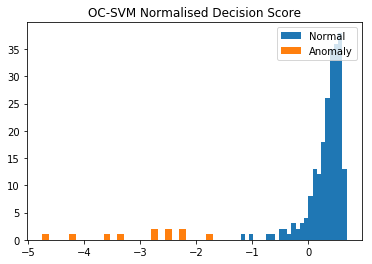

In [6]:
class OCSVM:
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    
    def test_OCSVM_Classifier(self,X_testPos,X_testNeg):
        

        X_test = np.concatenate((X_testPos,X_testNeg),axis=0)
        X_testPosLabel = np.ones(len(X_testPos))
        X_testNegLabel = np.zeros(len(X_testNeg))
        y_test = np.concatenate((X_testPosLabel,X_testNegLabel),axis=0)
        directory = os.getcwd()
        pipe = joblib.load(os.path.join(directory, 'pipeline.pkl'))
        model = models.load_model(os.path.join(directory, 'model.h5'))
        pipe.steps.append(('nn', model))


        y_pred_keras = pipe.predict_proba(X_test)[:, 0]
        from sklearn.metrics import roc_curve
        fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
        from sklearn.metrics import auc
        auc_keras = auc(fpr_keras, tpr_keras)
        print(auc_keras)
        return auc_keras
    
    def train_OCSVM_Classifier(self,X_train,nu,kernel):
        from sklearn import svm
        ocSVM = svm.OneClassSVM(nu = nu, kernel = kernel)
        ocSVM.fit(X_train) 

        return ocSVM

    
    
    def get_TestingData(self):

        dataPath = './'
        import tempfile
        import pickle

        with open(dataPath+'usps_data.pkl','rb') as fp:
              loaded_data1 = pickle.load(fp, encoding='latin1')

        labels = loaded_data1['target']
        data = loaded_data1['data']
        
        ## Scale the data 
       
  
        print(scaler.fit(data))
        StandardScaler(copy=True, with_mean=True, with_std=True)
        data = scaler.transform(data)
   
        ## Select Ones
        k_ones = np.where(labels == 2)
        label_ones = labels[k_ones]
        data_ones = data[k_ones]

        k_sevens = np.where(labels == 8)
        label_sevens = labels[k_sevens]
        data_sevens = data[k_sevens]


        data_ones = data_ones[220:440] 
        data_sevens = data_sevens[:11]
        # data_sevens =  np.random.uniform(0,1,(len(data_ones),256))
        
        label_ones      =  1*np.ones(len(data_ones))
        label_sevens    =  np.zeros(len(data_sevens))
        


        return [data_ones,label_ones,data_sevens,label_sevens]
    

        
        data_sevens =  np.random.uniform(0,1,(len(X),256))
        label_sevens    =  np.zeros(len(data_sevens))
        return [data_sevens,label_sevens]

   
    def get_TrainingData(self):
        
        dataPath = './'
        import tempfile
        import pickle
       

        with open(dataPath+'usps_data.pkl','rb') as fp:
              loaded_data1 = pickle.load(fp, encoding='latin1')

        labels = loaded_data1['target']
        data = loaded_data1['data']
        
        ## Scale the data 
       
        print(scaler.fit(data))
        StandardScaler(copy=True, with_mean=True, with_std=True)
        data = scaler.transform(data)
   
        ## Select Ones
        k_ones = np.where(labels == 2)
        label_ones = labels[k_ones]
        data_ones = data[k_ones]

        k_sevens = np.where(labels == 8)
        label_sevens = labels[k_sevens]
        data_sevens = data[k_sevens]


        data_ones = data_ones[:220] 
        label_ones      =  1*np.ones(len(data_ones))
       
        return [data_ones,label_ones]
    
    
    def fit(self,X,nu,kernel):
  
        print("Training the OCSVM classifier.....")
        clf = self.train_OCSVM_Classifier(X,nu,kernel)

        return clf

    
    def compute_au_roc(self,y_true, df_score):
        y_scores_pos = df_score[0]
        y_scores_neg = df_score[1]
        y_score = np.concatenate((y_scores_pos, y_scores_neg))
        
        from sklearn.metrics import roc_auc_score
        roc_score = roc_auc_score(y_true, y_score)
 
        return roc_score
         
         
    def predict(self,clf,Xtest_Pos,Xtest_Neg):
        decisionScore_POS = clf.decision_function(Xtest_Pos)
        decisionScore_Neg = clf.decision_function(Xtest_Neg)
        df_score = [ decisionScore_POS, decisionScore_Neg ]
        ## y_true
        y_true_pos = np.ones(Xtest_Pos.shape[0])
        y_true_neg = np.zeros(Xtest_Neg.shape[0])
        y_true = np.concatenate((y_true_pos, y_true_neg))
        
        plt.hist(decisionScore_POS, bins = 25, label = 'Normal');
        plt.hist(decisionScore_Neg, bins = 25, label = 'Anomaly');
        plt.legend(loc = 'upper right');
        plt.title('OC-SVM Normalised Decision Score');

        result = self.compute_au_roc(y_true,df_score)
        return result
        
        
ocsvm = OCSVM()
X_Pos,X_PosLabel = ocsvm.get_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= ocsvm.get_TestingData()
nu= 0.04
kernel = 'rbf'
clf = ocsvm.fit(X_Pos,nu,kernel)
res = ocsvm.predict(clf,Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)

### OC-NN


StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
Training the OCNN classifier.....
Training OC-NN started for epochs:  100
Epoch = 1, r = -566.405496
Total Cost:  18809752.0
Training Time taken, 0.16393804550170898
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -566.4054956054688
Epoch = 2, r = -565.850132
Total Cost:  18769572.0
Training Time taken, 0.29549384117126465
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -565.8501318359375
Epoch = 3, r = -565.294673
Total Cost:  18729436.0
Training Time taken, 0.4201350212097168
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -565.2946728515625
Epoch = 4, r = -564.739231
Total Cost:  18689348.0
Training Time taken, 0.624640941619873
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -564.7392309570313
Epoch = 5, 

Epoch = 32, r = -549.564211
Total Cost:  17588528.0
Training Time taken, 9.851768732070923
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -549.5642114257812
Epoch = 33, r = -549.044961
Total Cost:  17550060.0
Training Time taken, 10.380896091461182
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -549.0449609375
Epoch = 34, r = -548.525891
Total Cost:  17511650.0
Training Time taken, 10.928784847259521
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -548.5258911132812
Epoch = 35, r = -548.006990
Total Cost:  17473300.0
Training Time taken, 11.49016785621643
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -548.0069897460937
Epoch = 36, r = -547.488333
Total Cost:  17435014.0
Training Time taken, 12.063787937164307
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -547.4883325195312


Epoch = 63, r = -533.566121
Total Cost:  16424986.0
Training Time taken, 33.45150184631348
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -533.5661206054688
Epoch = 64, r = -533.053594
Total Cost:  16388457.0
Training Time taken, 34.45104002952576
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -533.05359375
Epoch = 65, r = -532.541401
Total Cost:  16351990.0
Training Time taken, 35.45442485809326
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -532.5414013671875
Epoch = 66, r = -532.029331
Total Cost:  16315586.0
Training Time taken, 36.47979283332825
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -532.0293310546875
Epoch = 67, r = -531.517537
Total Cost:  16279247.0
Training Time taken, 37.50884199142456
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -531.5175366210938
Epoch

Epoch = 94, r = -517.787144
Total Cost:  15321494.0
Training Time taken, 71.03477883338928
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -517.7871435546875
Epoch = 95, r = -517.281921
Total Cost:  15286882.0
Training Time taken, 72.4784209728241
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -517.2819213867188
Epoch = 96, r = -516.776912
Total Cost:  15252331.0
Training Time taken, 73.92968606948853
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -516.7769116210937
Epoch = 97, r = -516.272085
Total Cost:  15217839.0
Training Time taken, 75.4186360836029
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -516.2720849609375
Epoch = 98, r = -515.767549
Total Cost:  15183410.0
Training Time taken, 76.90238904953003
Saving the trained Model weights ... @ ./model_weights/
The optimized value of r found is -515.767548828125
Epo

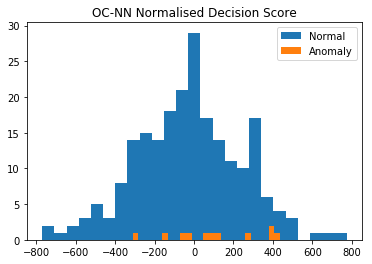

In [8]:
class OCNN:
    
    from sklearn.preprocessing import StandardScaler
    from sklearn import svm
    from sklearn.metrics import roc_auc_score
    import tensorflow as tf
    import numpy as np
    import numpy  as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as srn
  
    

    results = "./sanity_results/"
    decision_scorePath = "./scores/"
    df_usps_scores  = {}
    activations = ["Linear","Sigmoid"]
    methods = ["Linear","RBF"]
    path = "./scores/"
    model_weights = "./model_weights/"
   
    nu = 0.1
    scaler = StandardScaler()
    h_size = 200
    

    def write_Scores2Csv(self,train, trainscore, test, testscore,filename):

            data = np.concatenate((train, test))
            score= np.concatenate((trainscore,testscore))
            data = data.tolist()
            score = score.tolist()
            with open(filename, 'a') as myfile:
                wr = csv.writer(myfile)
                wr.writerow(("x", "score"))
            for row in range(0,len(data)):
                with open(filename,
                        'a') as myfile:
                    wr = csv.writer(myfile)

                    wr.writerow((" ".join(str(x) for x in data[row]), " ".join(str(x) for x in score[row])))
    def write_decisionScores2Csv(self,path, filename, positiveScores, negativeScores):

            newfilePath = path+filename
            print("Writing file to ", path+filename)
            poslist = positiveScores.tolist()
            neglist = negativeScores.tolist()

            # rows = zip(poslist, neglist)
            d = [poslist, neglist]
            export_data = izip_longest(*d, fillvalue='')
            with open(newfilePath, 'w') as myfile:
                wr = csv.writer(myfile)
                wr.writerow(("Normal", "Anomaly"))
                wr.writerows(export_data)
            myfile.close()

            return

    def train_OCNN_Classifier(self,X_train,nu,activation,epochs):

        RANDOM_SEED = 42
        tf.reset_default_graph()
        train_X = X_train
        tf.set_random_seed(RANDOM_SEED)
        outfile = "./model_weights/"
        oCSVMweights = "./weights/"
        import time

        # Layer's sizes
        x_size = train_X.shape[1]   # Number of input nodes: 4 features and 1 bias
        h_size = self.h_size             # Number of hidden nodes
        y_size = 1   # Number of outcomes (3 iris flowers)
        D = x_size
        K = h_size
        theta = np.random.normal(0, 1, K + K*D + 1)
        rvalue = np.random.normal(0,1,(len(train_X),y_size))
        g   = lambda x : (1/np.sqrt(h_size) )*tf.cos(x/0.02)

        def init_weights(shape):
            """ Weight initialization """
            weights = tf.random_normal(shape,mean=0, stddev=0.5)
            return tf.Variable(weights,trainable=False)

            def forwardprop(X, w_1, w_2):
                """
                Forward-propagation.
                IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
                """
                X = tf.cast(X, tf.float32)
                w_1 = tf.cast(w_1, tf.float32)
                w_2 = tf.cast(w_2, tf.float32)
                h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
                yhat = tf.matmul(h, w_2)  # The \varphi function
                return yhat
        
      
        
        def nnScore(X, w, V, g,bias1,bias2):
            X = tf.cast(X, tf.float32)
            w = tf.cast(w, tf.float32)
            V = tf.cast(V, tf.float32)
            y_hat =tf.matmul(g((tf.matmul(X, w)+bias1)), V) +bias2

            return y_hat
        
        def relu(x):
            y = x
            y[y < 0] = 0
            return y
        
        # For testing the algorithm
        def compute_LossValue(X, nu, w1, w2, g, r,bias1,bias2):
            w = w1
            V = w2

            X = tf.cast(X, tf.float32)
            w = tf.cast(w1, tf.float32)
            V = tf.cast(w2, tf.float32)
            term1 = 0.5 * tf.reduce_sum(tf.square(w))
            term2 = 0.5 * tf.reduce_sum(tf.square(V))


            
            term3 = 1 / nu * tf.reduce_mean(tf.nn.relu(r - nnScore(X, w, V, g,bias1,bias2)))
            term4 = -r
            
            y_hat = nnScore(X, w, V, g,bias1,bias2)
            
            totalCost = term1 + term2 + term3 + term4
                
            loss=   [term1,term2,term3,term4,totalCost,y_hat]
            
            return loss
            
            
        def ocnn_obj(theta, X, nu, w1, w2, g,r,bias1,bias2):

            w = w1
            V = w2
     
            X = tf.cast(X, tf.float32)
            w = tf.cast(w1, tf.float32)
            V = tf.cast(w2, tf.float32)


            term1 = 0.5  * tf.reduce_sum(w**2)
            term2 = 0.5  * tf.reduce_sum(V**2)
            term3 = 1/nu * tf.reduce_mean(tf.nn.relu(r - nnScore(X, w, V, g,bias1,bias2)))
            term4 = -r

            return term1 + term2 + term3 + term4





            # Symbols
        X = tf.placeholder("float32", shape=[None, x_size])

        r = tf.get_variable("r", dtype=tf.float32,shape=())

        # Weight initializations
        w_1 = init_weights((x_size, h_size))
           
        weights = tf.random_normal((h_size, y_size),mean=0, stddev=0.1)
           
        ocsvm_wt = np.load(oCSVMweights+"ocsvm_wt.npy")
        w_2 =tf.get_variable("tf_var_initialized_ocsvm",
                                initializer=ocsvm_wt)
            
        bias1 = tf.Variable(initial_value=[[1.0]], dtype=tf.float32,trainable=False)
        bias2 = tf.Variable(initial_value=[[0.0]], dtype=tf.float32,trainable=False)


        cost    = ocnn_obj(theta, X, nu, w_1, w_2, g,r,bias1,bias2)
        #updates = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)
        updates = tf.train.AdamOptimizer(4.7 * 1e-1).minimize(cost)

        # Run SGD
        sess = tf.Session()
        init = tf.global_variables_initializer()
        sess.run(init)
        rvalue = 0.1
        start_time = time.time()
        print("Training OC-NN started for epochs: ",epochs)
        for epoch in range(epochs):
                    # Train with each example
            sess.run(updates, feed_dict={X: train_X})
                        
                    
            with sess.as_default():
                svalue = nnScore(train_X, w_1, w_2, g,bias1,bias2)  
                rval = svalue.eval()
                rvalue = np.percentile(rval,q=100*nu)
                            

                costvalue = compute_LossValue(train_X, nu, w_1, w_2, g, rvalue,bias1,bias2)
                term1 = costvalue[0].eval()
                term2 = costvalue[1].eval()
                term3 = costvalue[2].eval()
                term4 = costvalue[3]
                term5 = costvalue[4].eval()
                yval = costvalue[5].eval()
                print ("================================")
                print ("Epoch = %d, r = %f"
                        % (epoch + 1,rvalue))
                print ("================================")
                print ("Total Cost: ",np.mean(term5))
                        
                import time
                trainTime = time.time() - start_time
                print("Training Time taken,",trainTime)
          
            
            
                with sess.as_default():
                    np_w_1= w_1.eval()
                    np_w_2= w_2.eval()
                    np_bias1= bias1.eval()
                    np_bias2= bias2.eval()
            
                rstar =rvalue
#             sess.close()
#             print("Session Closed!!!")

            # save the w_1 and bias1 to numpy array
            print("Saving the trained Model weights ... @",outfile)
            print("The optimized value of r found is",rstar)
            np.save(outfile+"w_1", np_w_1)
            np.save(outfile+"w_2", np_w_2)
            np.save(outfile+"bias1",np_bias1)
            np.save(outfile+"bias2",np_bias2)

   
    def get_TestingData(self):

        dataPath = './'
        import tempfile
        import pickle

        with open(dataPath+'usps_data.pkl','rb') as fp:
              loaded_data1 = pickle.load(fp, encoding='latin1')

        labels = loaded_data1['target']
        data = loaded_data1['data']
        
        ## Scale the data 
       
  
        print(scaler.fit(data))
        StandardScaler(copy=True, with_mean=True, with_std=True)
        data = scaler.transform(data)
   
        ## Select Ones
        k_ones = np.where(labels == 2)
        label_ones = labels[k_ones]
        data_ones = data[k_ones]

        k_sevens = np.where(labels == 8)
        label_sevens = labels[k_sevens]
        data_sevens = data[k_sevens]


        data_ones = data_ones[220:440] 
        data_sevens = data_sevens[0:11]
        # data_sevens =  np.random.uniform(0,1,(len(data_ones),256))
        
        label_ones      =  1*np.ones(len(data_ones))
        label_sevens    =  np.zeros(len(data_sevens))
        


        return [data_ones,label_ones,data_sevens,label_sevens]
    

        
        data_sevens =  np.random.uniform(0,1,(len(X),256))
        label_sevens    =  np.zeros(len(data_sevens))
        return [data_sevens,label_sevens]
  
    def get_TrainingData(self):
        
        dataPath = './'
        import tempfile
        import pickle
       

        with open(dataPath+'usps_data.pkl','rb') as fp:
              loaded_data1 = pickle.load(fp, encoding='latin1')

        labels = loaded_data1['target']
        data = loaded_data1['data']
        
        ## Scale the data 
       
        print(scaler.fit(data))
        StandardScaler(copy=True, with_mean=True, with_std=True)
        data = scaler.transform(data)
   
        ## Select Ones
        k_ones = np.where(labels == 2)
        label_ones = labels[k_ones]
        data_ones = data[k_ones]

        k_sevens = np.where(labels == 8)
        label_sevens = labels[k_sevens]
        data_sevens = data[k_sevens]


        data_ones = data_ones[:220] 
        label_ones      =  1*np.ones(len(data_ones))
       
        return [data_ones,label_ones]
     
    def fit(self,X,nu,activation,epochs):
  
        print("Training the OCNN classifier.....")
        self.train_OCNN_Classifier(X,nu,activation,epochs)

        return   
    
    def compute_au_roc(self,y_true, df_score):
        y_scores_pos = df_score[0]
        y_scores_neg = df_score[1]
        y_score = np.concatenate((y_scores_pos, y_scores_neg))
        from sklearn.metrics import roc_auc_score
        roc_score = roc_auc_score(y_true, y_score)
 
        return roc_score
    
    def decision_function(self,X, w_1, w_2, g,bias1,bias2):   
        score =np.matmul(g((np.matmul(X, w_1)+bias1)), w_2) +bias2
        return score

    def predict(self,Xtest_Pos,Xtest_Neg):
        
        ## Load the saved model and compute the decision score
        model_weights = "./model_weights/"
        w_1 = np.load(model_weights+"/w_1.npy")
        w_2 = np.load(model_weights+"/w_2.npy")
        bias1 = np.load(model_weights+"/bias1.npy")
        bias2 = np.load(model_weights+"/bias2.npy")
        
        
        g   = lambda x : (1/np.sqrt(self.h_size) )*np.cos(x/0.02)

        decisionScore_POS= self.decision_function(Xtest_Pos, w_1, w_2, g,bias1,bias2)
        decisionScore_Neg = self.decision_function(Xtest_Neg, w_1, w_2, g,bias1,bias2)
   
        df_score = [decisionScore_POS, decisionScore_Neg]
        
        ## y_true
        y_true_pos = np.ones(Xtest_Pos.shape[0])
        y_true_neg = np.zeros(Xtest_Neg.shape[0])
        y_true = np.concatenate((y_true_pos, y_true_neg))

        plt.hist(decisionScore_POS, bins = 25, label = 'Normal')
        plt.hist(decisionScore_Neg, bins = 25, label = 'Anomaly')
        plt.legend(loc = 'upper right')
        plt.title('OC-NN Normalised Decision Score')

        result = self.compute_au_roc(y_true,df_score)
        return result
        


## Instantiate the object and call the function
ocnn = OCNN()
X_Pos,X_PosLabel = ocnn.get_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= ocnn.get_TestingData()
nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,nu,activation,epochs)
res = ocnn.predict(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)




